# Exploration

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from pathlib import Path
import tmdbsimple as tmdb
import json
import sys

project_path = Path().cwd().parent.parent
data_path = project_path / "data"
src_path = project_path / "python" / "src"
secret_path = project_path / "secrets"
sys.path.append(str(src_path))

from cleaning import create_actors_dataframe

sns.set_style('ticks')

In [2]:
# Load your API key
with open(secret_path / "tmdb_api_key.txt", 'r') as f:
    key = f.readlines()[0].strip()
tmdb.API_KEY = key

In [3]:
movies = pd.read_csv(data_path / "tmdb-movie-metadata" / "tmdb_5000_movies.csv")
# credits = pd.read_csv(data_path / "tmdb-movie-metadata" / "tmdb_5000_credits.csv")
countries_producing = pd.read_csv(data_path / "countries_produce_movies.csv")
companies_producing = pd.read_csv(data_path / "companies_produce_movies.csv")
companies = pd.read_csv(data_path / "production_companies.csv", index_col=0)
countries = pd.read_csv(data_path / "production_countries.csv", index_col=0)

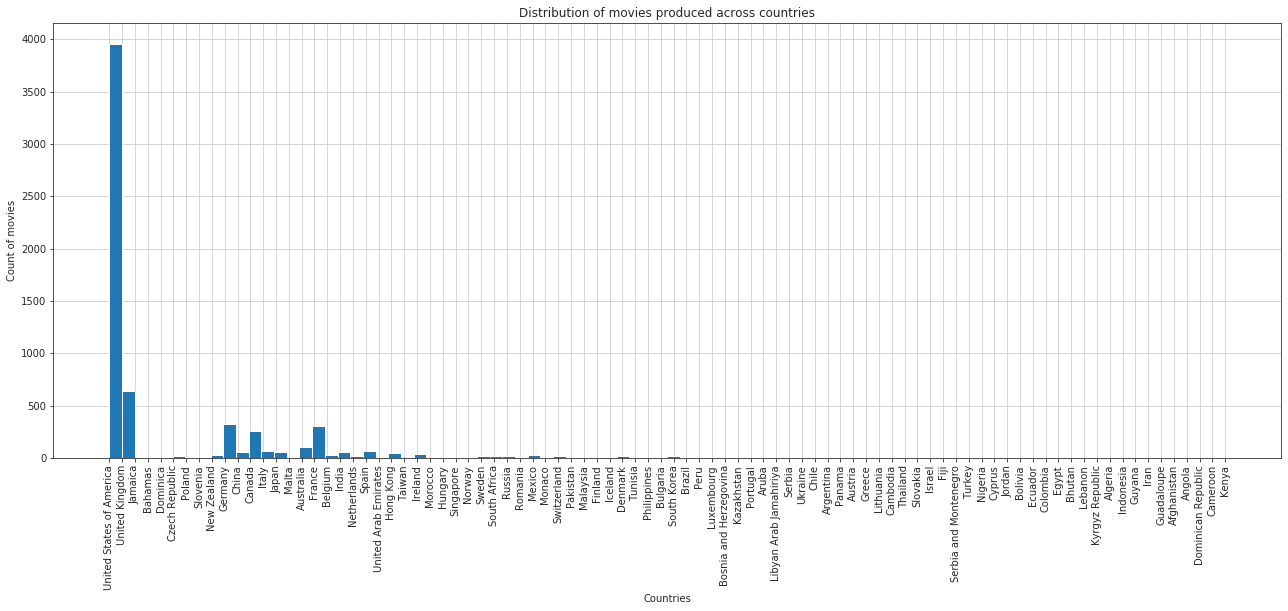

In [7]:
nb_countries = countries.shape[0]
df_merge_producing_countries = countries_producing.merge(countries, left_on='production_country_id', right_index=True)\
                                                  .reset_index(drop=True)

plt.figure(1, figsize=(22, 8))
df_merge_producing_countries.name.hist(bins=nb_countries)
_ = plt.xticks(rotation=90)
_ = plt.title('Distribution of movies produced across countries')
_ = plt.ylabel('Count of movies')
_ = plt.xlabel("Countries")

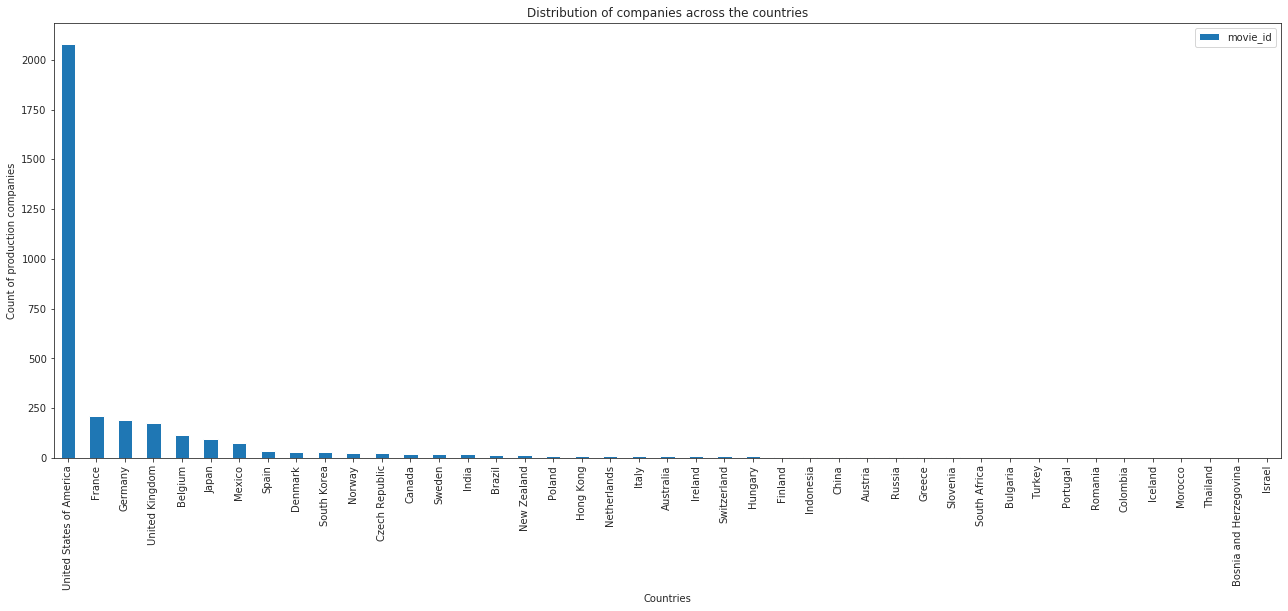

In [13]:
nb_companies = companies.shape[0]
df_merge_producing_companies = companies_producing.merge(companies,
                                    left_on='production_company_id',
                                    right_index=True)\
                                    .reset_index(drop=True)\
                                    .merge(countries, left_on='origin_country', right_on='iso_3166_1')\

df_merge_producing_companies.loc[:, ['name_y', 'movie_id']].groupby('name_y')\
                            .count()\
                            .sort_values('movie_id', ascending=False)\
                            .plot(kind='bar', figsize=(22, 8))
_ = plt.title('Distribution of companies across the countries')
_ = plt.ylabel('Count of production companies')
_ = plt.xlabel("Countries")

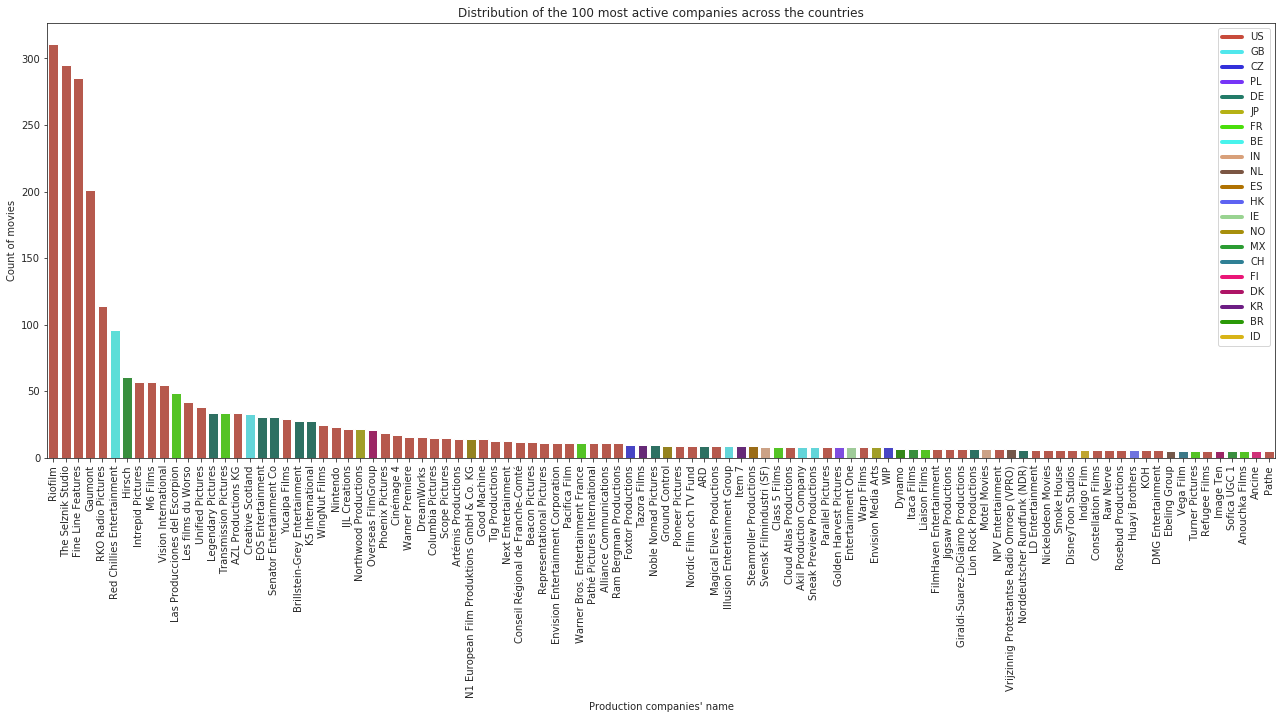

In [55]:
nb_companies_to_plot = 100
cmap = {country: '#%06X' % np.random.randint(0, 0xFFFFFF) for country in countries.iso_3166_1.unique()}

df_merge_producing_companies = companies_producing.merge(companies,
                                    left_on='production_company_id',
                                    right_index=True)\
                                    .reset_index(drop=True)\
                                    .merge(countries, left_on='origin_country', right_on='iso_3166_1')\

plt.figure(1, figsize=(22, 8))
data = df_merge_producing_companies.groupby('name_x').agg({'movie_id': 'count', 'iso_3166_1': lambda x: x.unique()[0]})\
                            .sort_values('movie_id', ascending=False)
data = data.reset_index()\
           .iloc[:nb_companies_to_plot]
rgb_array = data.iso_3166_1.map(lambda code: cmap[code]).values
color_dict = {k: v for k, v in cmap.items() if v in np.unique(rgb_array)}
custom_lines = [Line2D([0], [0], color=color, lw=4) for color in color_dict.values()]

sns.barplot(data=data, x='name_x', y='movie_id', palette=rgb_array)
_ = plt.xticks(rotation=90)
_ = plt.title('Distribution of the 100 most active companies across the countries')
_ = plt.ylabel('Count of movies')
_ = plt.xlabel("Production companies' name")
_ = plt.legend(custom_lines, color_dict.keys())

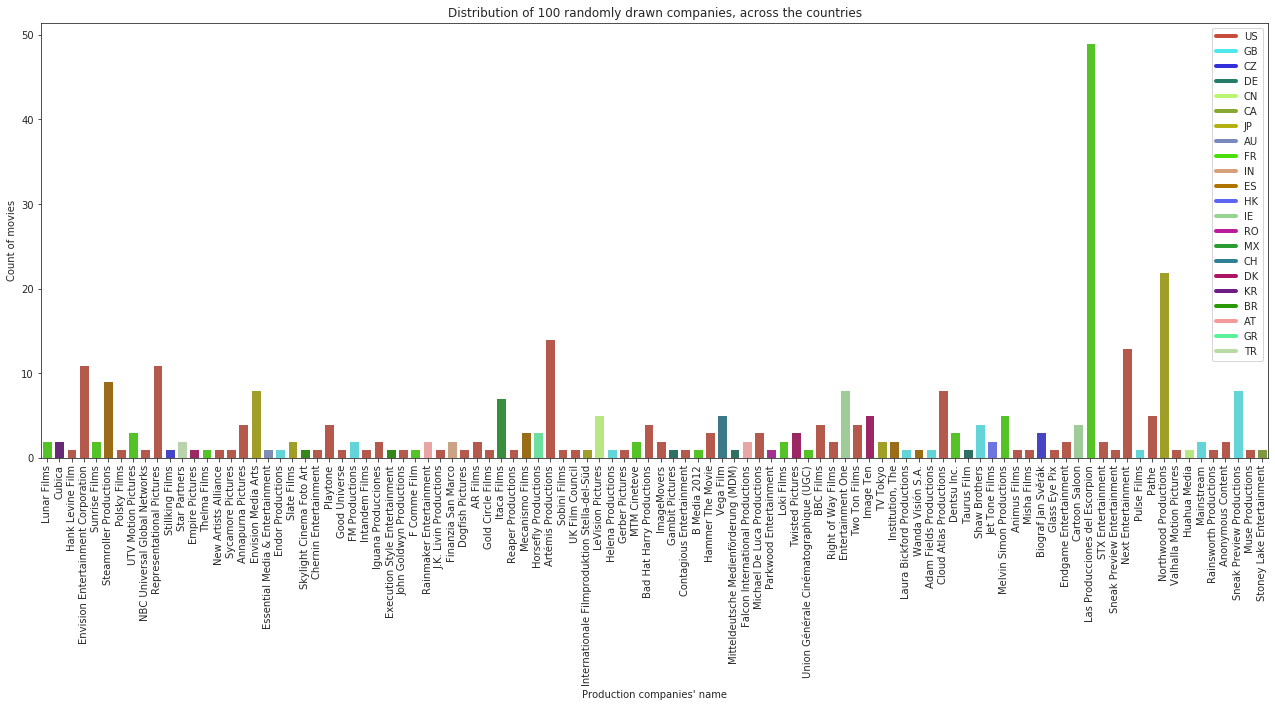

In [56]:
nb_companies_to_plot = 100

plt.figure(1, figsize=(22, 8))
data = df_merge_producing_companies.groupby('name_x').agg({'movie_id': 'count', 'iso_3166_1': lambda x: x.unique()[0]})\
                            .sort_values('movie_id', ascending=False)
data = data.reset_index()\
           .sample(nb_companies_to_plot)
rgb_array = data.iso_3166_1.map(lambda code: cmap[code]).values
color_dict = {k: v for k, v in cmap.items() if v in np.unique(rgb_array)}
custom_lines = [Line2D([0], [0], color=color, lw=4) for color in color_dict.values()]

sns.barplot(data=data, x='name_x', y='movie_id', palette=rgb_array)
_ = plt.xticks(rotation=90)
_ = plt.title('Distribution of 100 randomly drawn companies, across the countries')
_ = plt.ylabel('Count of movies')
_ = plt.xlabel("Production companies' name")
_ = plt.legend(custom_lines, color_dict.keys())